In [1]:
%matplotlib inline

import numpy as np
import scipy, h5py
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import ternary

/Users/charles/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Data import

In [2]:
path_data = "../data/DataSet_0p20val.hdf5"
path_raman = "../data/NKAS_Raman.hdf5"
path_density = "../data/NKAS_density.hdf5"

f = h5py.File(path_data, 'r')
# Entropy dataset
X_entropy_train = f["X_entropy_train"].value
y_entropy_train = f["y_entropy_train"].value

X_entropy_valid = f["X_entropy_valid"].value
y_entropy_valid = f["y_entropy_valid"].value

X_entropy_test = f["X_entropy_test"].value
y_entropy_test = f["y_entropy_test"].value

# Viscosity dataset
X_train = f["X_train"].value
y_train = f["y_train"].value

X_valid = f["X_valid"].value
y_valid = f["y_valid"].value

X_test = f["X_test"].value
y_test = f["y_test"].value

# Tg dataset
X_tg_train = f["X_tg_train"].value
X_tg_valid= f["X_tg_valid"].value
X_tg_test = f["X_tg_test"].value

y_tg_train = f["y_tg_train"].value
y_tg_valid = f["y_tg_valid"].value
y_tg_test = f["y_tg_test"].value

f.close()

# Raman dataset
f = h5py.File(path_raman, 'r')
X_raman_train = f["X_raman_train"].value
y_raman_train = f["y_raman_train"].value
X_raman_valid = f["X_raman_test"].value
y_raman_valid = f["y_raman_test"].value
f.close()

# Density dataset
f = h5py.File(path_density, 'r')
X_density_train = f["X_density_train"].value
X_density_valid = f["X_density_valid"].value
X_density_test = f["X_density_test"].value

y_density_train = f["y_density_train"].value
y_density_valid = f["y_density_valid"].value
y_density_test = f["y_density_test"].value
f.close()



In [3]:
def ternary_dataflow(data):

    # Third column is now sum of alkalis
    data[:,2] = data[:,2]+data[:,3]
    
    return data[:,[1,0,2]]

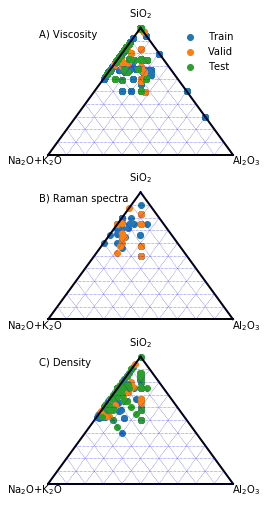

In [5]:
figure = plt.figure(figsize=(3.22,7))
ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)

tax1 = ternary.TernaryAxesSubplot(ax=ax1,scale=1)
tax2 = ternary.TernaryAxesSubplot(ax=ax2,scale=1)
tax3 = ternary.TernaryAxesSubplot(ax=ax3,scale=1)

tax1.boundary(linewidth=2.0)
tax1.gridlines(multiple=0.1, color="blue")
tax1.scatter(ternary_dataflow(X_train), marker='o', color='C0', alpha=1., label="Train")
tax1.scatter(ternary_dataflow(X_valid), marker='o', color='C1', alpha=1., label="Valid")
tax1.scatter(ternary_dataflow(X_test), marker='o', color='C2', alpha=1., label="Test")

tax2.boundary(linewidth=2.0)
tax2.gridlines(multiple=0.1, color="blue")
tax2.scatter(ternary_dataflow(X_raman_train), marker='o', color='C0', alpha=1., label="Train")
tax2.scatter(ternary_dataflow(X_raman_valid), marker='o', color='C1', alpha=1., label="Valid")

tax3.boundary(linewidth=2.0)
tax3.gridlines(multiple=0.1, color="blue")
tax3.scatter(ternary_dataflow(X_density_train), marker='o', color='C0', alpha=1., label="Train")
tax3.scatter(ternary_dataflow(X_density_valid), marker='o', color='C1', alpha=1., label="Valid")
tax3.scatter(ternary_dataflow(X_density_test), marker='o', color='C2', alpha=1., label="Test")

# Set ticks
# tax1.ticks(axis='lbr', linewidth=0.1,multiple=0.1)
# tax2.ticks(axis='lbr', linewidth=0.1)
# tax3.ticks(axis='lbr', linewidth=0.1)

# Remove default Matplotlib Axes
tax1.clear_matplotlib_ticks()
tax2.clear_matplotlib_ticks()
tax3.clear_matplotlib_ticks()

tax1.get_axes().axis('off')
tax2.get_axes().axis('off')
tax3.get_axes().axis('off')

tax1.right_corner_label("Al$_2$O$_3$")
tax1.top_corner_label("SiO$_2$")
tax1.left_corner_label("Na$_2$O+K$_2$O")

tax2.right_corner_label("Al$_2$O$_3$")
tax2.top_corner_label("SiO$_2$")
tax2.left_corner_label("Na$_2$O+K$_2$O")

tax3.right_corner_label("Al$_2$O$_3$")
tax3.top_corner_label("SiO$_2$")
tax3.left_corner_label("Na$_2$O+K$_2$O")

ax1.annotate("A) Viscosity",xy=(0.0,0.9),xycoords="axes fraction")
ax2.annotate("B) Raman spectra",xy=(0.0,0.9),xycoords="axes fraction")
ax3.annotate("C) Density",xy=(0.0,0.9),xycoords="axes fraction")

ax1.legend(loc="upper right",frameon=False)

plt.tight_layout()
plt.savefig("Datas_ternary.pdf")